### Fonksyonlar

In [ ]:
def load_and_prep_image(filename, img_shape=64, colour_channel="grayscale"):
  #Read image
  img = tf.io.read_file(filename)
  #Decode the read file
  img= tf.image.decode_image(img)
  #Resize the image
  img= tf.image.resize(img,size=[img_shape,img_shape])
  #Scaling the image
  img=tf.image.rgb_to_grayscale(img, name=None)
  img= img/255.
  return img
def pred_and_plot(model, filename, class_names):
  
  #import the target image and pre process it
  img= load_and_prep_image(filename)

  #make predictions
  pred = model.predict(tf.expand_dims(img,axis=0))

  #Get the predicted class
  pred_class= class_names[int(tf.round(pred.argmax()))]
  #plot the image and predicted class
 ##### ? plt.title(f"Prediction: {pred_class}")
  plt.imshow(img)
  plt.axis("off")
  print(pred_class, pred)

In [ ]:
def plot_loss_curves(history):
  
  loss= history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epo= range(len(history.history["loss"]))
  

  plt.plot(epo, loss, label="Training_Loss")
  plt.plot(epo, val_loss, label="val_Loss")
  plt.title=("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epo, accuracy, label="Training_accuracy")
  plt.plot(epo, val_accuracy, label="val_accuracy")
  plt.title=("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
# İmage Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    #Setup Target Directory
    target_folder= target_dir+"/"+target_class
    
    #Get Random İmage
    random_image= random.sample(os.listdir(target_folder),1)
    print(random_image)
    #Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}")
    
    return img

In [ ]:
#THE CONFUSION MATRIX
#-------------------------------------------------
import itertools
from sklearn.metrics import confusion_matrix

def PrettyConfusionMatrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15 ):

    cm=confusion_matrix(y_true,y_pred)
    cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    n_classes=cm.shape[0]

    #Making prettify
    fig, ax= plt.subplots(figsize=figsize)
    # Create matrix Plot
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    #Create clases

    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    #axis labeling
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    #Set x axis to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust  label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size+10)
    #set thresh hold for different Colours
    threshold= (cm.max()+cm.min())/2

    #Plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment= "center",
                color="white"  if cm[i,j]>threshold else "black",
                size=15)

### Loading Images

In [ ]:
import zipfile
zip_ref= zipfile.ZipFile("Histogram_Datas_Upload.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os 
#walkthrough all classes
for dirpath,dirnames , filenames in os.walk("Histogram_Datas_Upload"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'Histogram_Datas_Upload'.
There are 7 directories and 0 images in 'Histogram_Datas_Upload/test'.
There are 0 directories and 18 images in 'Histogram_Datas_Upload/test/fear'.
There are 0 directories and 18 images in 'Histogram_Datas_Upload/test/happy'.
There are 0 directories and 18 images in 'Histogram_Datas_Upload/test/sad'.
There are 0 directories and 18 images in 'Histogram_Datas_Upload/test/surprised'.
There are 0 directories and 18 images in 'Histogram_Datas_Upload/test/angry'.
There are 0 directories and 18 images in 'Histogram_Datas_Upload/test/neutral'.
There are 0 directories and 18 images in 'Histogram_Datas_Upload/test/disgust'.
There are 7 directories and 0 images in 'Histogram_Datas_Upload/train'.
There are 0 directories and 105 images in 'Histogram_Datas_Upload/train/fear'.
There are 0 directories and 105 images in 'Histogram_Datas_Upload/train/happy'.
There are 0 directories and 104 images in 'Histogram_Datas_Upload/train/sad'.
The

In [ ]:
#Setup train and test directories
train_dir="Histogram_Datas_Upload/train/"
test_dir="Histogram_Datas_Upload/test/"
#Lets get the class names
import pathlib
import numpy as np

data_dir= pathlib.Path(train_dir)
class_names= np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprised']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_size= 64
#Rescale
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale= 1/255.)

#load data from directories

train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                               color_mode= "grayscale")

test_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                             color_mode= "grayscale")


Found 727 images belonging to 7 classes.
Found 126 images belonging to 7 classes.


In [ ]:
#Model Libraries
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPool2D,BatchNormalization, Activation
from tensorflow.keras import Sequential

### Modelller

In [ ]:
model_17= Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(16,3, activation="relu"),
    Conv2D(16,5, activation="relu"),
    BatchNormalization(name='batchnorm_2'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(40, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_17.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_17=model_17.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )


Epoch 1/100
23/23 [==============================] - 22s 370ms/step - loss: 2.8387 - accuracy: 0.1320 - val_loss: 1.9458 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 5s 229ms/step - loss: 1.9332 - accuracy: 0.1609 - val_loss: 1.9435 - val_accuracy: 0.1905
Epoch 3/100
23/23 [==============================] - 5s 228ms/step - loss: 1.9098 - accuracy: 0.1527 - val_loss: 1.9312 - val_accuracy: 0.1587
Epoch 4/100
23/23 [==============================] - 5s 230ms/step - loss: 1.8774 - accuracy: 0.1774 - val_loss: 1.9251 - val_accuracy: 0.1508
Epoch 5/100
23/23 [==============================] - 5s 229ms/step - loss: 1.8517 - accuracy: 0.2338 - val_loss: 1.9136 - val_accuracy: 0.2540
Epoch 6/100
23/23 [==============================] - 5s 229ms/step - loss: 1.8076 - accuracy: 0.2531 - val_loss: 1.9268 - val_accuracy: 0.1429
Epoch 7/100
23/23 [==============================] - 5s 229ms/step - loss: 1.7709 - accuracy: 0.2600 - val_loss: 1.9042 - val_accuracy: 0.206

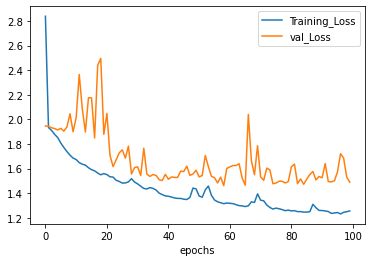

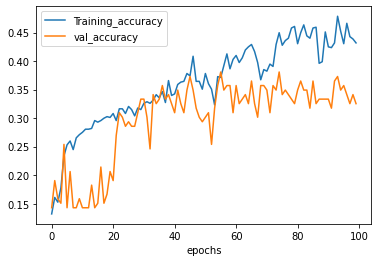

In [ ]:
plot_loss_curves(history_17)

In [ ]:
IMG_size= 224
#Rescale
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale= 1/255.)

#load data from directories

train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                               color_mode= "grayscale",
                                               shuffle= True)

test_data = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                             color_mode= "grayscale")

Found 727 images belonging to 7 classes.
Found 126 images belonging to 7 classes.


In [ ]:
model_17= Sequential([
    Conv2D(filters=64, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64,3, activation="relu"),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64,3, activation="relu"),
    Conv2D(64,3, activation="relu"),
    BatchNormalization(name='batchnorm_2'),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_17.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_17=model_17.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )


Epoch 1/100
23/23 [==============================] - 4s 90ms/step - loss: 1.9095 - accuracy: 0.2435 - val_loss: 1.9394 - val_accuracy: 0.2063
Epoch 2/100
23/23 [==============================] - 1s 50ms/step - loss: 1.3876 - accuracy: 0.4897 - val_loss: 1.9542 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 1s 49ms/step - loss: 1.0642 - accuracy: 0.5970 - val_loss: 2.0354 - val_accuracy: 0.1429
Epoch 4/100
23/23 [==============================] - 1s 50ms/step - loss: 0.8966 - accuracy: 0.6850 - val_loss: 2.2036 - val_accuracy: 0.1825
Epoch 5/100
23/23 [==============================] - 1s 50ms/step - loss: 0.7112 - accuracy: 0.7373 - val_loss: 2.3344 - val_accuracy: 0.1825
Epoch 6/100
23/23 [==============================] - 1s 50ms/step - loss: 0.5538 - accuracy: 0.8033 - val_loss: 2.7181 - val_accuracy: 0.1429
Epoch 7/100
23/23 [==============================] - 1s 50ms/step - loss: 0.4643 - accuracy: 0.8542 - val_loss: 3.2996 - val_accuracy: 0.1429
Epoch 

In [ ]:
model_14= Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="tanh"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_14.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_14=model_14.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 4s 106ms/step - loss: 1.9061 - accuracy: 0.2173 - val_loss: 1.9390 - val_accuracy: 0.1746
Epoch 2/100
23/23 [==============================] - 2s 71ms/step - loss: 1.4392 - accuracy: 0.4525 - val_loss: 1.8503 - val_accuracy: 0.4127
Epoch 3/100
23/23 [==============================] - 2s 70ms/step - loss: 1.1017 - accuracy: 0.5846 - val_loss: 1.8370 - val_accuracy: 0.2937
Epoch 4/100
23/23 [==============================] - 2s 72ms/step - loss: 0.8710 - accuracy: 0.6781 - val_loss: 1.6090 - val_accuracy: 0.4841
Epoch 5/100
23/23 [==============================] - 1s 45ms/step - loss: 0.7748 - accuracy: 0.6988 - val_loss: 1.6166 - val_accuracy: 0.4683
Epoch 6/100
23/23 [==============================] - 1s 45ms/step - loss: 0.6272 - accuracy: 0.7689 - val_loss: 1.4185 - val_accuracy: 0.5952
Epoch 7/100
23/23 [==============================] - 1s 46ms/step - loss: 0.4980 - accuracy: 0.8184 - val_loss: 1.2640 - val_accuracy: 0.6429
Epoch

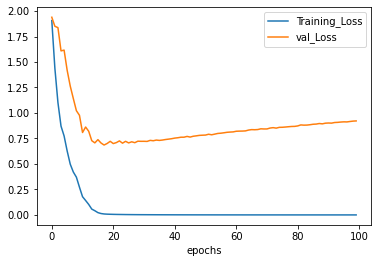

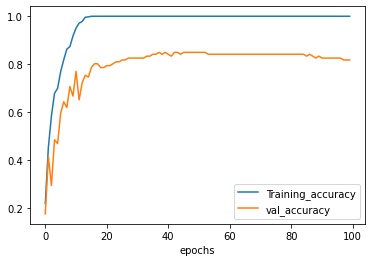

In [ ]:
plot_loss_curves(history_14)

In [ ]:
model_1= Sequential([
    Conv2D(filters=32, kernel_size=(4,4), activation="relu",input_shape=(IMG_size,IMG_size,1)),
     MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
    Conv2D(32,3, activation="relu"),
       MaxPool2D(),
    Flatten(),
    
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_1.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_1=model_1.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 4s 91ms/step - loss: 1.9495 - accuracy: 0.1307 - val_loss: 1.9449 - val_accuracy: 0.1667
Epoch 2/100
23/23 [==============================] - 2s 72ms/step - loss: 1.9421 - accuracy: 0.1664 - val_loss: 1.9297 - val_accuracy: 0.1587
Epoch 3/100
23/23 [==============================] - 1s 48ms/step - loss: 1.8101 - accuracy: 0.2572 - val_loss: 1.7561 - val_accuracy: 0.2381
Epoch 4/100
23/23 [==============================] - 1s 44ms/step - loss: 1.5041 - accuracy: 0.4099 - val_loss: 1.7118 - val_accuracy: 0.3413
Epoch 5/100
23/23 [==============================] - 1s 43ms/step - loss: 1.3815 - accuracy: 0.4553 - val_loss: 1.5816 - val_accuracy: 0.3175
Epoch 6/100
23/23 [==============================] - 1s 43ms/step - loss: 1.2564 - accuracy: 0.4993 - val_loss: 1.4950 - val_accuracy: 0.3730
Epoch 7/100
23/23 [==============================] - 1s 43ms/step - loss: 1.2121 - accuracy: 0.5392 - val_loss: 1.4316 - val_accuracy: 0.4127
Epoch 

In [ ]:
model_2= Sequential([
    Conv2D(filters=128, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(128,3, activation="relu"),
    MaxPool2D(),
    Conv2D(128,3, activation="relu"),
    Conv2D(128,3, activation="relu"),
    MaxPool2D(),
    Conv2D(128,3, activation="relu"),
    Conv2D(128,3, activation="relu"),
    BatchNormalization(name='batchnorm_2'),
    Conv2D(128,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_2.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_2=model_2.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )


Epoch 1/100
23/23 [==============================] - 7s 210ms/step - loss: 2.0282 - accuracy: 0.2187 - val_loss: 2.0069 - val_accuracy: 0.1508
Epoch 2/100
23/23 [==============================] - 2s 94ms/step - loss: 1.7583 - accuracy: 0.3315 - val_loss: 1.9846 - val_accuracy: 0.1429
Epoch 3/100
23/23 [==============================] - 2s 96ms/step - loss: 1.4618 - accuracy: 0.4360 - val_loss: 2.1811 - val_accuracy: 0.1429
Epoch 4/100
23/23 [==============================] - 2s 93ms/step - loss: 1.2231 - accuracy: 0.5296 - val_loss: 2.2480 - val_accuracy: 0.1429
Epoch 5/100
23/23 [==============================] - 2s 98ms/step - loss: 1.0794 - accuracy: 0.5750 - val_loss: 2.2128 - val_accuracy: 0.1429
Epoch 6/100
23/23 [==============================] - 3s 122ms/step - loss: 0.9627 - accuracy: 0.6355 - val_loss: 2.9316 - val_accuracy: 0.1429
Epoch 7/100
23/23 [==============================] - 2s 83ms/step - loss: 0.8111 - accuracy: 0.7084 - val_loss: 2.6001 - val_accuracy: 0.1984
Epoc

In [ ]:
model_2= Sequential([
    Conv2D(filters=64, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64,3, activation="relu"),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(40, activation="relu"),
    Dense(40, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_2.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_2=model_2.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
23/23 [==============================] - 3s 92ms/step - loss: 1.9484 - accuracy: 0.1403 - val_loss: 1.9438 - val_accuracy: 0.1429
Epoch 2/100
23/23 [==============================] - 2s 81ms/step - loss: 1.9365 - accuracy: 0.1816 - val_loss: 1.8941 - val_accuracy: 0.2460
Epoch 3/100
23/23 [==============================] - 2s 75ms/step - loss: 1.7666 - accuracy: 0.2682 - val_loss: 1.6029 - val_accuracy: 0.3413
Epoch 4/100
23/23 [==============================] - 1s 50ms/step - loss: 1.3935 - accuracy: 0.4828 - val_loss: 1.3865 - val_accuracy: 0.5556
Epoch 5/100
23/23 [==============================] - 1s 48ms/step - loss: 1.1213 - accuracy: 0.5805 - val_loss: 1.2398 - val_accuracy: 0.5873
Epoch 6/100
23/23 [==============================] - 1s 49ms/step - loss: 1.0022 - accuracy: 0.6575 - val_loss: 1.0758 - val_accuracy: 0.5952
Epoch 7/100
23/23 [==============================] - 1s 48ms/step - loss: 0.8433 - accuracy: 0.6933 - val_loss: 1.0181 - val_accuracy: 0.6429
Epoch 

### modeller maksimum 3 tane maxpool içermeli

In [ ]:
model_3= Sequential([
    Conv2D(filters=64, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    Conv2D(64,3, activation="relu"),
    MaxPool2D(),
    Conv2D(128,3, activation="relu"),
    Conv2D(128,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_3.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_3=model_3.fit(
    train_data,
    epochs=50,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/50
23/23 [==============================] - 2s 63ms/step - loss: 1.9558 - accuracy: 0.1651 - val_loss: 1.9326 - val_accuracy: 0.1746
Epoch 2/50
23/23 [==============================] - 1s 53ms/step - loss: 1.7592 - accuracy: 0.3260 - val_loss: 1.4714 - val_accuracy: 0.4286
Epoch 3/50
23/23 [==============================] - 1s 53ms/step - loss: 1.2187 - accuracy: 0.5213 - val_loss: 1.2179 - val_accuracy: 0.5476
Epoch 4/50
23/23 [==============================] - 1s 53ms/step - loss: 0.9954 - accuracy: 0.6547 - val_loss: 1.1785 - val_accuracy: 0.5556
Epoch 5/50
23/23 [==============================] - 1s 52ms/step - loss: 0.8519 - accuracy: 0.6589 - val_loss: 1.1159 - val_accuracy: 0.5873
Epoch 6/50
23/23 [==============================] - 1s 52ms/step - loss: 0.6387 - accuracy: 0.7593 - val_loss: 0.9530 - val_accuracy: 0.6825
Epoch 7/50
23/23 [==============================] - 1s 53ms/step - loss: 0.4986 - accuracy: 0.8157 - val_loss: 1.0675 - val_accuracy: 0.6825
Epoch 8/50
23

In [ ]:
model_4= Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    BatchNormalization(name='batchnorm_1'),
    Conv2D(128,3, activation="relu"),
    Conv2D(256,3, activation="relu"),
    MaxPool2D(),
    Conv2D(256,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_4.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_4=model_4.fit(
    train_data,
    epochs=50,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/50
23/23 [==============================] - 5s 164ms/step - loss: 2.8414 - accuracy: 0.1747 - val_loss: 1.9458 - val_accuracy: 0.1429
Epoch 2/50
23/23 [==============================] - 3s 133ms/step - loss: 1.6716 - accuracy: 0.3508 - val_loss: 1.9287 - val_accuracy: 0.3095
Epoch 3/50
23/23 [==============================] - 3s 123ms/step - loss: 1.3350 - accuracy: 0.4869 - val_loss: 1.8905 - val_accuracy: 0.3889
Epoch 4/50
23/23 [==============================] - 3s 122ms/step - loss: 1.0285 - accuracy: 0.6162 - val_loss: 1.8478 - val_accuracy: 0.3889
Epoch 5/50
23/23 [==============================] - 3s 122ms/step - loss: 0.8844 - accuracy: 0.6781 - val_loss: 1.7374 - val_accuracy: 0.5238
Epoch 6/50
23/23 [==============================] - 3s 123ms/step - loss: 0.6898 - accuracy: 0.7483 - val_loss: 1.5633 - val_accuracy: 0.6746
Epoch 7/50
23/23 [==============================] - 3s 122ms/step - loss: 0.6090 - accuracy: 0.7703 - val_loss: 1.5369 - val_accuracy: 0.6984
Epoch 

In [ ]:
import zipfile
zip_ref= zipfile.ZipFile("full_datas.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
Data_dir="full_datas/"
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE= 64
#Rescale
datagen= ImageDataGenerator(validation_split=0.2 ,rescale=1/255.)

#load data from directories

train_data = datagen.flow_from_directory(Data_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                               color_mode= "grayscale",
                                               subset='training')

test_data = datagen.flow_from_directory(Data_dir,
                                                 target_size=(IMG_size,IMG_size),
                                                 batch_size=32,
                                                 class_mode="categorical",
                                             color_mode= "grayscale",
                                             subset='validation')



Found 1263 images belonging to 7 classes.
Found 312 images belonging to 7 classes.


In [ ]:
model_14= Sequential([
    Conv2D(filters=20, kernel_size=(5,5), activation="relu",input_shape=(IMG_size,IMG_size,1)),
    MaxPool2D(),
    Conv2D(20,2, activation="relu"),
    MaxPool2D(),
    Conv2D(40,2, activation="relu"),
    MaxPool2D(),
    Conv2D(80,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1000, activation="relu"),
    Dense(2000, activation="relu"),
    Dense(7, activation="softmax")
])
#Compile the model

model_14.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"],
                )

#fit the model
history_14=model_14.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps= len(test_data)
    )

Epoch 1/100
40/40 [==============================] - 10s 220ms/step - loss: 1.9487 - accuracy: 0.1409 - val_loss: 1.9434 - val_accuracy: 0.1506
Epoch 2/100
40/40 [==============================] - 6s 146ms/step - loss: 1.9445 - accuracy: 0.1386 - val_loss: 1.9418 - val_accuracy: 0.1571
Epoch 3/100
40/40 [==============================] - 6s 148ms/step - loss: 1.9430 - accuracy: 0.1568 - val_loss: 1.9403 - val_accuracy: 0.1571
Epoch 4/100
40/40 [==============================] - 6s 149ms/step - loss: 1.8612 - accuracy: 0.2067 - val_loss: 1.8756 - val_accuracy: 0.2436
Epoch 5/100
40/40 [==============================] - 6s 150ms/step - loss: 1.6611 - accuracy: 0.2882 - val_loss: 1.6955 - val_accuracy: 0.2532
Epoch 6/100
40/40 [==============================] - 6s 148ms/step - loss: 1.4900 - accuracy: 0.3690 - val_loss: 1.4379 - val_accuracy: 0.3750
Epoch 7/100
40/40 [==============================] - 6s 147ms/step - loss: 1.3275 - accuracy: 0.4363 - val_loss: 1.4862 - val_accuracy: 0.426

Epoch 1/100
14/40 [=========>....................] - ETA: 8s - loss: 1.9596 - accuracy: 0.1384

KeyboardInterrupt: ignored

TypeError: ignored